In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [5]:
(X_train,y_train,),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train[0].shape

(28, 28)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

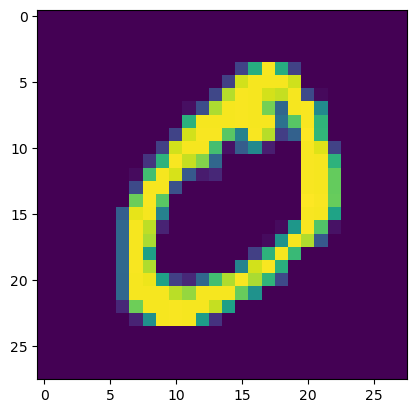

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [21]:
model = Sequential()

In [42]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu')) # add extra layer 
model.add(Dense(10,activation='softmax'))

/Users/tejsharm/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 360,714 (1.38 MB)

 Trainable params: 124,148 (484.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,566 (924.09 KB)

In [51]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [52]:
history = model.fit(X_train,y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 738us/step - accuracy: 0.9965 - loss: 0.0174 - val_accuracy: 0.9757 - val_loss: 0.1520
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.9961 - loss: 0.0217 - val_accuracy: 0.9689 - val_loss: 0.1786
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9958 - loss: 0.0234 - val_accuracy: 0.9754 - val_loss: 0.1484
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9975 - loss: 0.0133 - val_accuracy: 0.9751 - val_loss: 0.1602
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9953 - loss: 0.0206 - val_accuracy: 0.9750 - val_loss: 0.1522
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.9969 - loss: 0.0169 - val_accuracy: 0.9768 - val_loss: 0.1482
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9977 - loss: 0.0110 - val_accuracy: 0.9780 - val_loss: 0.1542
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.9954 -

In [53]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


In [54]:
y_pred = y_prob.argmax(axis = 1)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9748

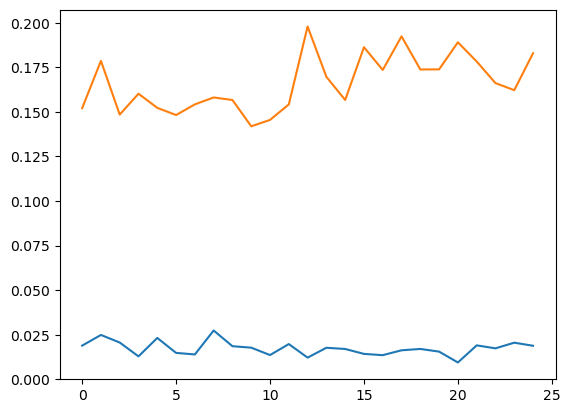

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


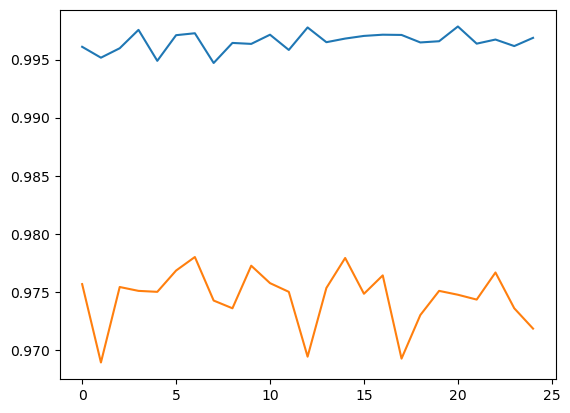

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


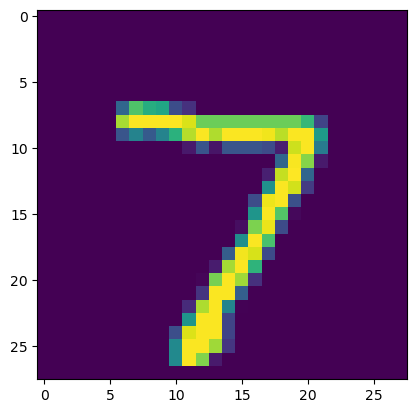

In [60]:
plt.imshow(X_test[0])

In [61]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.6726905e-05, 3.6763435e-04, 1.6932578e-04, 5.7006553e-05,
        6.9643887e-05, 3.7461294e-05, 6.9272774e-06, 9.9848598e-01,
        5.1757310e-05, 7.3754200e-04]], dtype=float32)